# QUANTUM TELEPORTATION

**Transmitting one qubit using two classical bits (with a classical channel + entanglement).**


**1 ebit + 2 bits $ \succeq $ 1 qubit**

>**qubit**: transferring one-qubit quantum system <br />
**bit**: transferring one-bit message <br />
**ebit**: consuming of bipartite entanglement (contained in a maximally entangled two-qubit state) 





Alice's qubit

$ \vert A \rangle = \vert 0_A \rangle $ 

Bob's qubit

$ \vert B \rangle = \vert 0_B \rangle $ 

A message from Alice to Bob

$ \vert \Psi \rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$

### #1  Generating a EPR Pair

$\vert \Phi^{+} \rangle = CX\big(H \vert A \rangle  \otimes \vert B \rangle \big) $

$ H \vert 0_A \rangle  \otimes \vert 0_B \rangle = \frac{1}{\sqrt{2}} \big( \vert 0_A \rangle + \vert 1_A \rangle \big) \otimes \vert 0_B \rangle = \frac{1}{\sqrt{2}} \big( \vert 0_A 0_B \rangle + \vert 1_A 0_B\rangle \big) $

$ CX \frac{1}{\sqrt{2}} \big( \vert 0_A 0_B \rangle + \vert 1_A 0_B\rangle \big) =  \frac{1}{\sqrt{2}} \big( \vert 0_A 0_B \rangle + \vert 1_A 1_B\rangle \big) $ 

So from now on, Alice and Bob are sharing a pair of entangled qubits that will be used to send a message

### #2  Manipulations on an unknown quantum state $\vert \Psi \rangle $

Alice possesses a qubit that she'll send to Bob. The overall three-qubit state is:

$ \vert \Psi \rangle  \otimes \vert  \Phi^{+} \rangle = \big( \alpha \vert 0 \rangle + \beta \vert 1 \rangle \big) \otimes  \frac{1}{\sqrt{2}} \big( \vert 0_A 0_B \rangle + \vert 1_A 1_B\rangle \big) =  \frac{1}{\sqrt{2}} \big(\alpha \vert 0_{} 0_A 0_B \rangle + \alpha \vert 0_{} 1_A 1_B \rangle + \beta \vert 1_{} 0_A 0_B \rangle + \beta \vert 1_{} 1_A 1_B \rangle \big)$

CNOT

$ \frac{1}{\sqrt{2}} \big(\alpha \vert 0_{} 0_A 0_B \rangle + \alpha \vert 0_{} 1_A 1_B \rangle + \beta \vert 1_{} 1_A 0_B \rangle + \beta \vert 1_{} 0_A 1_B \rangle \big) $

H

$ \frac{1}{\sqrt{2}} \Big( \frac{\alpha}{\sqrt{2}} \big(\vert 0 \rangle + \vert 1 \rangle \big) \otimes \vert 0_A 0_B + \frac{\alpha}{\sqrt{2}} \big(\vert 0 \rangle + \vert 1 \rangle \big) \otimes \vert 1_A 1_B  +  \frac{\beta}{\sqrt{2}} \big(\vert 0 \rangle - \vert 1 \rangle \big) \otimes \vert 1_A 0_B  + \frac{\beta}{\sqrt{2}} \big(\vert 0 \rangle - \vert 1 \rangle \big) \otimes \vert 0_A 1_B \Big) = $

$ \frac{1}{2} \big( \alpha \vert 0_{} 0_A 0_B \rangle + \alpha \vert 1_{} 0_A 0_B \rangle + \alpha \vert 0_{} 1_A 1_B \rangle + \alpha \vert 1_{} 1_A 1_B \rangle + \beta \vert 0_{} 1_A 0_B \rangle - \beta \vert 1_{} 1_A 0_B \rangle + \beta \vert 0_{} 0_A 1_B \rangle - \beta \vert 1_{} 0_A 1_B \rangle    \big)  = $

$ \frac{1}{2} \Big( \vert 0_{} 0_A \rangle \otimes \big(\alpha \vert 0_B \rangle + \beta \vert 1_B \rangle \big) + \vert 0_{} 1_A \rangle \otimes \big(\alpha \vert 1_B \rangle + \beta \vert 0_B \rangle \big) +  \vert 1_{} 0_A \rangle \otimes \big(\alpha \vert 0_B \rangle - \beta \vert 1_B \rangle \big) + \vert 1_{} 1_A \rangle \otimes \big(\alpha \vert 1_B \rangle - \beta \vert 0_B \rangle \big)      \Big) $

### #3  Measurement on Alice's qubits

When Alice perform measurement on her qubits, she obtains one of four possible results $\vert 0 0 \rangle$, $\vert 0 1 \rangle$, $\vert 1 0 \rangle$ or $\vert 1 1 \rangle$ -
each outcome has a 25% chance

if Alice obtain $\vert 0 0 \rangle$ Bob will have  qubit in a quantum state $\alpha \vert 1 \rangle + \beta \vert 0 \rangle$

if Alice obtain $\vert 0 1 \rangle$ Bob will have  qubit in a quantum state $\alpha \vert 0 \rangle + \beta \vert 1 \rangle$

if Alice obtain $\vert 1 0 \rangle$ Bob will have  qubit in a quantum state $\alpha \vert 0 \rangle - \beta \vert 1 \rangle$

if Alice obtain $\vert 1 1 \rangle$ Bob will have  qubit in a quantum state $\alpha \vert 1 \rangle - \beta \vert 0 \rangle$

Now, Alice sends her result to Bob using two bits via a classical channel.

### #3  Manipulations on Bob's qubit 
Alice's measurement result tells Bob which one of four possible unitary transformations has to perform on his qubit.


In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute

from qiskit.quantum_info import Statevector, random_statevector
from qiskit.visualization import array_to_latex, plot_bloch_multivector, plot_histogram

from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

#IBMQ.enable_account(token)
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')

In [8]:
def generating_epr_pair():
        
    alice  = QuantumRegister(1, "alice")
    bob    = QuantumRegister(1, "bob")
    calice = ClassicalRegister(1,"calice")
    cbob   = ClassicalRegister(1,"cbob")
    qc     = QuantumCircuit(alice, bob, calice, cbob)
    
    qc.h(alice) #Hadamard Gate
    qc.cx(alice, bob) #CNOT Gate
    
    state = Statevector(qc)
    
    return qc, alice, bob, calice, cbob, state

def generating_psi(qc):
    
    psi = QuantumRegister(1, "psi")
    cpsi = ClassicalRegister(1,"cpsi")
    
    qc.add_register(psi, cpsi)

    qc.barrier()
    
    state = Statevector(qc)
    
    return qc, psi, cpsi, state 

def alice_operations(qc, psi, alice):
        
    qc.cx(psi, alice) #CNOT Gate
    qc.h(psi) #Hadamard Gate
    
    qc.barrier()

    
    state = Statevector(qc)
    
    return qc, state


#def measurement_alice(qc, psi, alice):
#return qc



def measurement_bob(qc, psi, alice, bob):
    
    qc.measure(psi, cpsi[0])
    qc.measure(alice, calice[0])

    
    qc.measure(bob, cbob[0])
    

    aer_sim = Aer.get_backend('aer_simulator')
    qobj = assemble(qc)
    result = aer_sim.run(qobj).result()
    counts = result.get_counts(qc)
    return counts


def output(qc, state1, state2, state3, counts):
    print("\n---- STATE1  -------------------------------------------\n")
    display(array_to_latex(state1, prefix="|A \\rangle \\otimes |B \\rangle ="))

    print("\n---- STATE2 ---------------------------------------------\n")
    display(array_to_latex(state2, prefix="|A \\rangle \\otimes |B \\rangle \\otimes |\\psi \\rangle ="))
    
    print("\n---- STATE3 ---------------------------------------------\n")
    display(array_to_latex(state3, prefix="|A \\rangle \\otimes |B \\rangle \\otimes |\\psi \\rangle ="))



    print("\n---- SHOW CIRCUIT --------------------------------------\n")
    display(qc.draw(output='mpl'))
    

    print("\n---- IBM QPU 1024 SHOTS --------------------------------\n")
    plot_histogram(counts)
    print(counts)


---- STATE1  -------------------------------------------



<IPython.core.display.Latex object>


---- STATE2 ---------------------------------------------



<IPython.core.display.Latex object>


---- STATE3 ---------------------------------------------



<IPython.core.display.Latex object>


---- SHOW CIRCUIT --------------------------------------



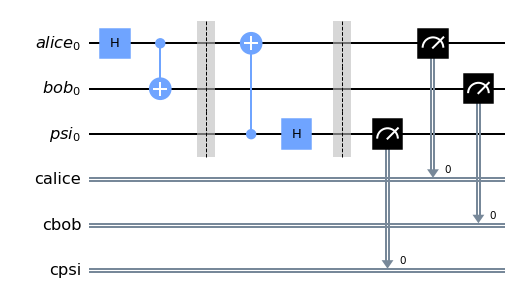


---- IBM QPU 1024 SHOTS --------------------------------

{'1 0 0': 245, '0 1 1': 259, '0 0 0': 259, '1 1 1': 261}


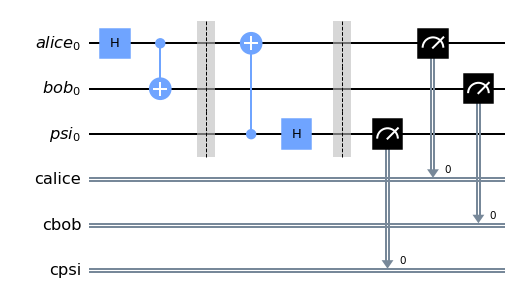

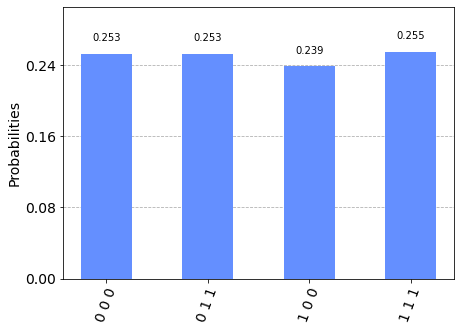

In [9]:
qc, alice, bob, calice, cbob, state1 = generating_epr_pair()
qc, psi, cpsi, state2                = generating_psi(qc)
qc, state3               = alice_operations(qc, psi, alice)

#measurement_alice(qc, psi, alice)

counts = measurement_bob(qc, psi, alice, bob)

output(qc, state1, state2, state3, counts)
